# Lista de Exercícios 2

## Métodos implementados

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def bisection(f,l,u,epsilon,maxiter=100):
  iter = 1
  err = 1
  x = None
  xra = float('+inf')

  while err > epsilon and iter < maxiter:
    x = (l+u)/2

    if f(l)*f(x) < 0:
      u = x
    elif f(x)*f(u) < 0:
      l = x
    elif f(l)*f(u) == 0:
      break
    else:
      raise Error('Some error')

    err = abs(x-xra)/abs(x)
    xra = x
    iter += 1

  return x, iter, err

In [3]:
def false_position(f,l,u,epsilon,maxiter=100):
  iter = 1
  err = 1
  x = None
  xra = float('+inf')

  while err > epsilon and iter < maxiter:
    x = (l*f(u) - u*f(l))/(f(u) - f(l))

    if f(l)*f(x) < 0:
      u = x
    elif f(x)*f(u) < 0:
      l = x
    elif f(l)*f(u) == 0:
      break
    else:
      raise Error('Some error')

    err = abs(x-xra)/abs(x)
    xra = x
    iter += 1

  return x, iter, err

In [4]:
def estima_iter(a,b,tol):
  return np.ceil(((np.log(b-a)-np.log(tol)))/np.log(2))

## 1) Determine a raiz real de $f(x) = 5x^{3} - 5x^{2} + 6x - 2$:

(a) Graficamente.

(b) Usando o método da bissecção para localizar a raiz. Use as aproximações iniciais xl = 0 e xu = 1 e itere até que o erro estimado 𝜀𝑎 fique abaixo de um nível 𝜀𝑠 = 10%.

In [5]:
f1 = lambda x : 5*x**3 - 5*x**2 + 6*x - 2

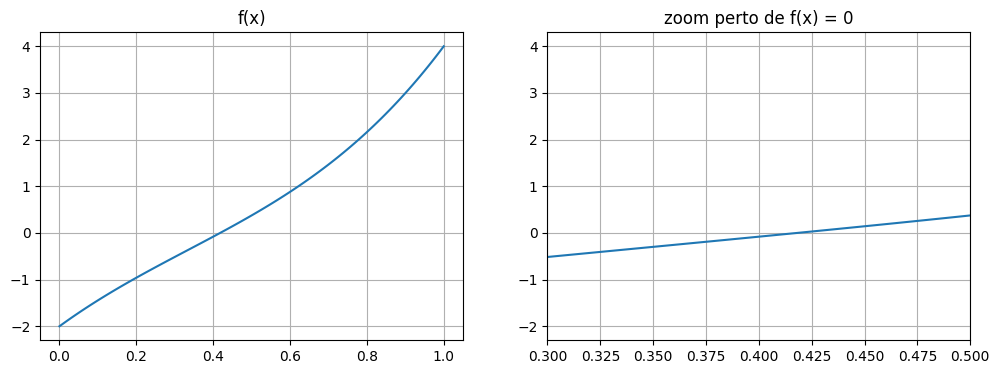

In [8]:
x = np.linspace(0,1,100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(x, f1(x))
axes[1].plot(x, f1(x))
axes[1].set_xlim([0.3,0.5])
axes[0].set_title('f(x)')
axes[1].set_title('zoom perto de f(x) = 0')
axes[0].grid()
axes[1].grid()

In [9]:
ans = bisection(f1, 0, 1, 0.1)
print(ans)

(0.40625, 6, 0.07692307692307693)


## 2) Determine a raiz real de $f(x) = -25 + 82x - 90x^{2} + 44x^{3} - 8x^{4} + 0,7x^{5}$:
(a) Graficamente;

(b) Usando o método da bissecção para determinar a raiz até 𝜀𝑠 = 10%. Use as aproximações iniciais xl = 0,5 e xu = 1,0.

(c) Faça os mesmos cálculos do item anterior, mas use o método da falsa posição e 𝜀𝑠 = 0,2%.

In [10]:
f2 = lambda x : -25 + 82*x - 90*x**2 + 44*x**3 - 8*x**4 + 0.7*x**5

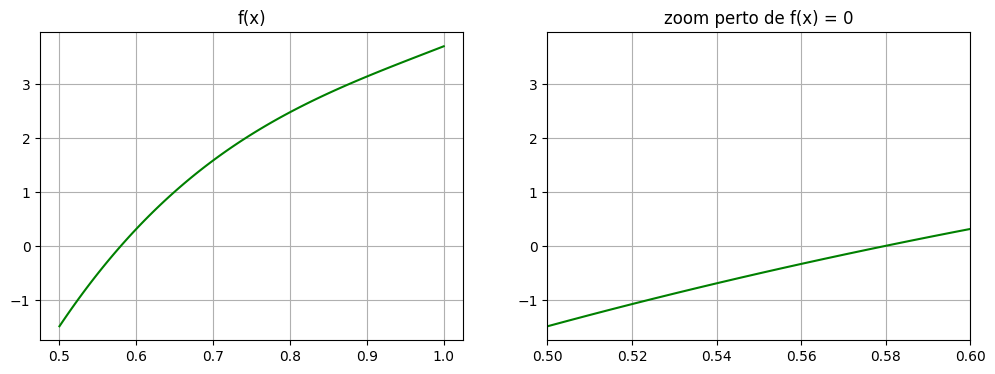

In [11]:
x = np.linspace(0.5,1,100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(x,f2(x),'g')
axes[1].plot(x,f2(x),'g')
axes[1].set_xlim([0.5,0.6])
axes[0].set_title('f(x)')
axes[1].set_title('zoom perto de f(x) = 0')
axes[0].grid()
axes[1].grid()

In [12]:
ans = bisection(f2, 0.5, 1, 0.1)
print(ans)

(0.59375, 5, 0.05263157894736842)


In [13]:
ans = false_position(f2, 0.5, 1, 0.002)
print(ans)

(0.5795562476116108, 5, 0.0016919782782566747)


## 3) Localize a primeira raiz não-trivial de $sen(x) = x^{3}$, onde x está em radianos. Use uma técnica gráfica e a bissecção com o intervalo inicial de 0,5 a 1. Faça os cálculos até que 𝜀𝑎 seja menor do que 𝜀𝑠 = 2%. Faça também uma verificação do erro substituindo sua resposta final na equação original.

In [14]:
f3 = lambda x : np.sin(x) - x**3

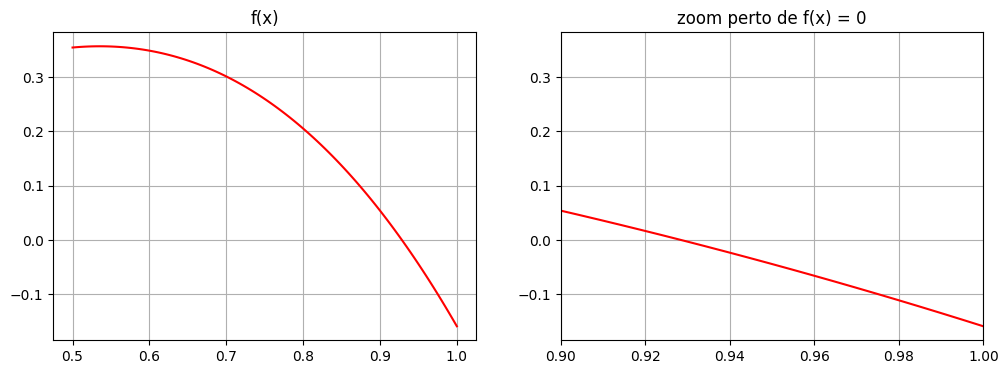

In [15]:
x = np.linspace(0.5,1,100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(x,f3(x), 'r')
axes[1].plot(x,f3(x), 'r')
axes[1].set_xlim([0.9,1.0])
axes[0].set_title('f(x)')
axes[1].set_title('zoom perto de f(x) = 0')
axes[0].grid()
axes[1].grid()

In [16]:
ans = bisection(f3, 0.5, 1, 0.02)
print(ans)
print(f3(0.921875))

(0.921875, 6, 0.01694915254237288)
0.01327742392963882


## 4) Determine a raiz real positiva de $ln(x^4) = 0,7$

(a) usando três iterações do método da bissecção, com aproximações iniciais xl = 0,5 e xu = 2, e

(b) usando três iterações do método da falsa posição, com as mesmas aproximações iniciais que em (a). Compare os erros relativos aproximados ao final das iterações entre os dois métodos.

In [17]:
f4 = lambda x : np.log(x**4) - 0.7

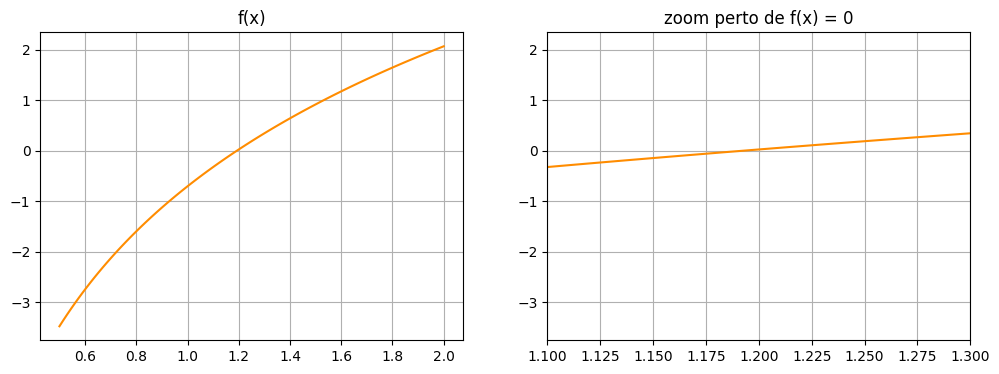

In [18]:
x = np.linspace(.5,2,100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(x, f4(x), 'darkorange')
axes[1].plot(x, f4(x), 'darkorange')
axes[1].set_xlim([1.1,1.3])
axes[0].set_title('f(x)')
axes[1].set_title('zoom perto de f(x) = 0')
axes[0].grid()
axes[1].grid()

In [19]:
ans = bisection(f4, 0.5, 2, 1e-6, 3)
print(ans)
print(f4(ans[0]))

(0.875, 3, 0.42857142857142855)
-1.2341255704980905


In [20]:
ans = false_position(f4, 0.5, 2, 1e-6, 3)
print(ans)
print(f4(ans[0]))

(1.2712715063519116, 3, 0.13221583031236184)
0.26007034288731945


## 5) Determine a raiz real de $f(x) = (0,8 - 0,3x)/x$:

(a) Analiticamente;

(b) Graficamente;

(c) Usando três iterações do método da falsa posição e aproximações iniciais 1 e 3. Calcule o erro aproximado (𝜀𝑎) e o erro verdadeiro (𝜀𝑣) depois de cada iteração. Há algum problema com o resultado?

A) $0,8 - 0,3x = 0  \rightarrow x = 0,8/0,3$

In [21]:
f5 = lambda x : (0.8 - 0.3*x) / x

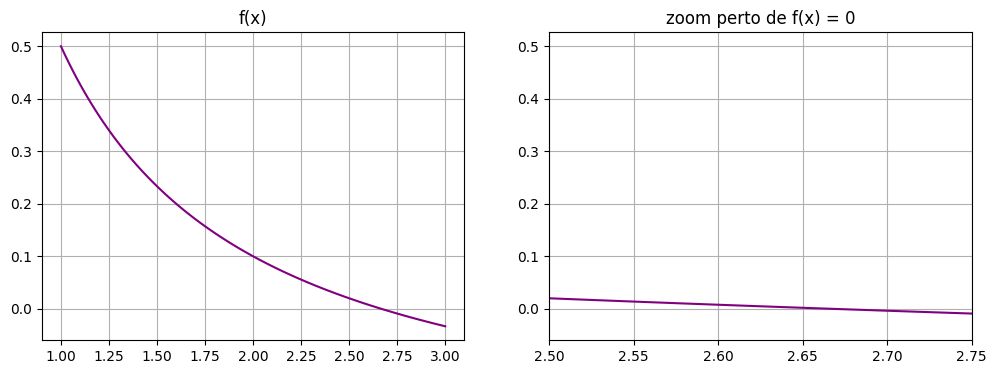

In [22]:
x = np.linspace(1,3,100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(x,f5(x), 'purple')
axes[1].plot(x,f5(x), 'purple')
axes[1].set_xlim([2.5,2.75])
axes[0].set_title('f(x)')
axes[1].set_title('zoom perto de f(x) = 0')
axes[0].grid()
axes[1].grid()

In [23]:
ans = false_position(f5, 1, 3, 1e-6)
print(ans)

(2.666670873924828, 25, 9.466315927304477e-07)


## 6) Encontre a raiz quadrada positiva de 18 usando o método da falsa posição até 𝜀𝑠 = 0,5%. Use aproximações iniciais xl = 4 e xu = 5

In [24]:
f6 = lambda x : x**2 - 18

In [25]:
ans = false_position(f6, 4, 5, 0.005)
print(ans)

(4.240963855421687, 3, 0.004419191919191974)


## 7) Dada $f(x) = -2x^{6} - 1,5x^{4} + 10x + 2$. Use a bissecção para determinar o máximo dessa função. Use aproximações iniciais xl = 0 e xu = 1 e faça iterações até que o erro relativo aproximado fique abaixo de 5%.

In [26]:
f7 = lambda x : -2*x**6 - 1.5*x**4 + 10*x + 2

In [27]:
df7_dx = lambda x: -12*x**5 - 6*x**3 + 10

In [28]:
ans = bisection(df7_dx, 0, 1, 0.05)
print(ans)

(0.84375, 6, 0.037037037037037035)


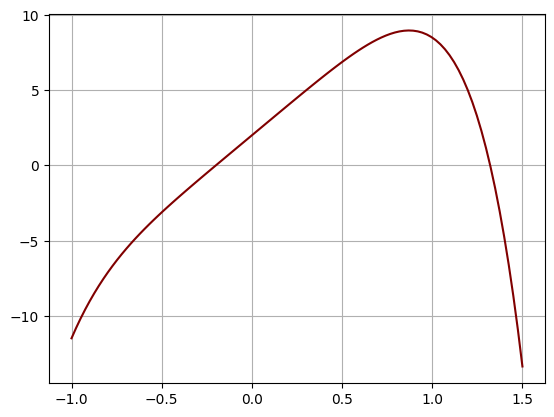

In [29]:
x = np.linspace(-1,1.5,100)
plt.plot(x, f7(x), 'maroon')
plt.grid()